# INTRODUCTION

#### I am creating this solution/product to demonstrate how a basic Machine Learning program works. I am using the infamous Titanic datset for this purpose.

#### Objective: is for E-learning, understand how to create Machine Learning solutions

#### Target Audience: Students, Professionals who are willing to start learning Machine Learning 

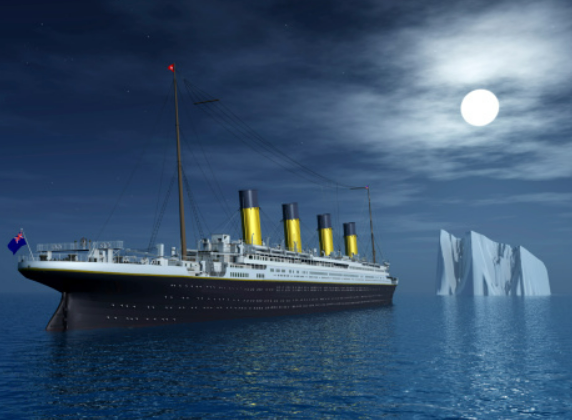

In [54]:
from IPython.display import Image
Image("../input/image1/Titanic.png")

# TITANIC Exploratory Data Analysis and Prediction

# 1. Import Libraries

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-extended/train.csv
/kaggle/input/titanic-extended/full.csv
/kaggle/input/titanic-extended/test.csv
/kaggle/input/image1/Titanic.png


# 2. Get datasets and read them

In [56]:
df_train = pd.read_csv('../input/titanic-extended/train.csv')
df_test = pd.read_csv('../input/titanic-extended/test.csv')

In [57]:
df_train.shape

(891, 21)

In [58]:
df_test.shape

(418, 20)

In [59]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked WikiId  \
0      0         A/5 21171   7.2500  ...        S  691.0   
1      0          PC 17599  71.2833  ...        C   90.0   
2      0  STON/O2. 3101282   7.9250  ...        S  865.0   
3      0            113803  53.1000  ...        S  127.0   
4      0            373450   8.0500  ...        S  627.0   

                                    Name_wiki Age_wiki  \
0                     Braund, Mr. Owen Harris     22.0   
1  Cumings, Mrs. Florence Briggs (née Thayer)     35.0   
2                       Heikkinen, Miss Laina     26.0   
3          Futrelle, Mrs. Lily May (née Peel)     35.0   
4                    Allen, Mr. William Henry     35.0   

                             Hometown      Boarded  \
0          Bridgerule, Devon, England  Southampton   
1              New York, New York, US    Cherbourg   
2                  Jyväskylä, Finland  Southampton   
3         Scituate, Massachusetts, US  Southampton   
4  Birmingham, West Midlands, England  Southampton   

                               Destination Lifeboat Body Class  
0  Qu'Appelle Valley, Saskatchewan, Canada      NaN  NaN   3.0  
1                   New York, New York, US        4  NaN   1.0  
2                            New York City      14?  NaN   3.0  
3              Scituate, Massachusetts, US        D  NaN   1.0  
4                            New York City      NaN  NaN   3.0  

[5 rows x 21 columns]

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

# 3. Exploratory Data Analysis

### We will perform Correlation between variables in the dataset

<AxesSubplot:>

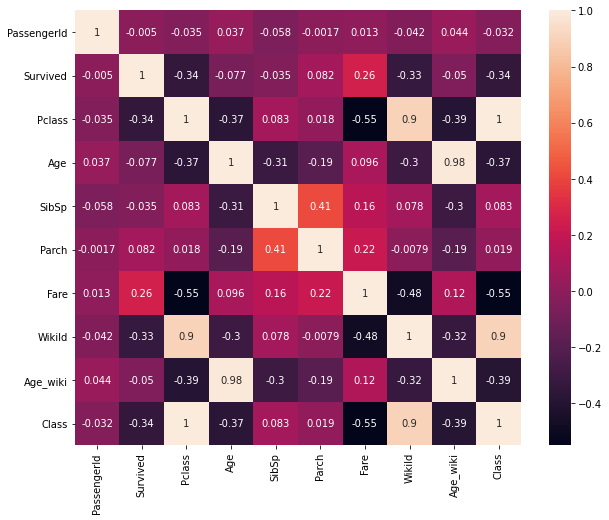

In [61]:
import seaborn as sns # We will use for Data visualization purposes
import matplotlib.pyplot as plt

correlation = df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot = True)

### We will use an auto EDA package using Pandas Profiling to understand the data

In [62]:
import pandas_profiling as pp

In [63]:
pp.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
# Let's drop columns - which have more NULL values

df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

df_train = df_train.drop(['Body'], axis=1)
df_test = df_test.drop(['Body'], axis=1)

df_train = df_train.drop(['Lifeboat'], axis=1)
df_test = df_test.drop(['Lifeboat'], axis=1)

# Let's drop WikiId column - may not be useful for our analysis
#PassengerId we will keep, since that is our key

df_train = df_train.drop(['WikiId'], axis=1)
df_test = df_test.drop(['WikiId'], axis=1)

# Let's drop name columns - these may not be useful for our analysis as well

df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

df_train = df_train.drop(['Name_wiki'], axis=1)
df_test = df_test.drop(['Name_wiki'], axis=1)

In [65]:
df_train.head(3)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1       0.0       3    male  22.0      1      0   
1            2       1.0       1  female  38.0      1      0   
2            3       1.0       3  female  26.0      0      0   

             Ticket     Fare Embarked  Age_wiki                    Hometown  \
0         A/5 21171   7.2500        S      22.0  Bridgerule, Devon, England   
1          PC 17599  71.2833        C      35.0      New York, New York, US   
2  STON/O2. 3101282   7.9250        S      26.0          Jyväskylä, Finland   

       Boarded                              Destination  Class  
0  Southampton  Qu'Appelle Valley, Saskatchewan, Canada    3.0  
1    Cherbourg                   New York, New York, US    1.0  
2  Southampton                            New York City    3.0

In [66]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Class            2
dtype: int64

In [68]:
# We will use an automated library to prepare our dataset to handle categorical and numerical values both exist
import fastai
from fastai import *
from fastai.tabular.all import *

# cont_names = Continuous variables in the dataset
# cat_names = Categorical variables in the dataset
procs = [Categorify, FillMissing, Normalize] 
splits = RandomSplitter(valid_pct = 0.20)(range_of(df_train))
cont_names, cat_names = cont_cat_split(df_train, 1, 'Survived')

to = TabularPandas(df_train,procs,cat_names,cont_names,y_names='Survived',splits=splits)
to.show(5)

# 4. Model Development

In [69]:
x_train, y_train = to.train.xs, to.train.y
x_test, y_test = to.valid.xs, to.valid.y

In [70]:
# We are just using Random Forest from sklearn
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [71]:
# We are just using Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='lbfgs', max_iter=5000)
lr_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

# 5. Model Evaluation

In [72]:
from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8314606741573034

In [73]:
y_pred = lr_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8202247191011236

# 6. Final Output Interpretation and Result

In [74]:
to_test = TabularPandas(df_test, procs, cat_names, cont_names)

outcome = rf_classifier.predict(to_test.xs.drop('Fare_na', axis=1))
output= pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived': outcome.astype(int)})
output.to_csv('./submission_titanic.csv', index=False)